In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import BayesianRidge, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Read data
file_path_lag0 = "eTraffic_final_lag0_v4.csv"
df_lag0 = pd.read_csv(file_path_lag0)

file_path_lag1 = "eTraffic_final_lag1_v4.csv"
df_lag1 = pd.read_csv(file_path_lag1)

file_path_lag2 = "eTraffic_final_lag2_v4.csv"
df_lag2 = pd.read_csv(file_path_lag2)

file_path_lag3 = "eTraffic_final_lag3_v4.csv"
df_lag3 = pd.read_csv(file_path_lag3)

file_path_lag4 = "eTraffic_final_lag4_v4.csv"
df_lag4 = pd.read_csv(file_path_lag4)

df_lag0 = df_lag0.drop(columns=["local_authority_name"])
df_lag1 = df_lag1.drop(columns=["local_authority_name"])
df_lag2 = df_lag2.drop(columns=["local_authority_name"])
df_lag3 = df_lag3.drop(columns=["local_authority_name"])
df_lag4 = df_lag4.drop(columns=["local_authority_name"])

In [2]:
# Calculate the correlation between traffic flow data and GDP
corr_matrix_lag0 = df_lag0.corr()["GDP"].drop("GDP")
top_features_lag0 = corr_matrix_lag0[abs(corr_matrix_lag0) > 0.05].index.tolist()  # Only features with high relevance are retained
print(f"The high correlation features selected by lag0 are as follows: {top_features_lag0}")

corr_matrix_lag1 = df_lag1.corr()["GDP"].drop("GDP")
top_features_lag1 = corr_matrix_lag1[abs(corr_matrix_lag1) > 0.05].index.tolist()  # Only features with high relevance are retained
print(f"The high correlation features selected by lag1 are as follows: {top_features_lag1}")

corr_matrix_lag2 = df_lag2.corr()["GDP"].drop("GDP")
top_features_lag2 = corr_matrix_lag2[abs(corr_matrix_lag2) > 0.05].index.tolist()  # Only features with high relevance are retained
print(f"The high correlation features selected by lag2 are as follows: {top_features_lag2}")

corr_matrix_lag3 = df_lag3.corr()["GDP"].drop("GDP")
top_features_lag3 = corr_matrix_lag3[abs(corr_matrix_lag3) > 0.05].index.tolist()  # Only features with high relevance are retained
print(f"The high correlation features selected by lag3 are as follows: {top_features_lag3}")

corr_matrix_lag4 = df_lag4.corr()["GDP"].drop("GDP")
top_features_lag4 = corr_matrix_lag4[abs(corr_matrix_lag4) > 0.05].index.tolist()  # Only features with high relevance are retained
print(f"The high correlation features selected by lag4 are as follows: {top_features_lag4}")

The high correlation features selected by lag0 are as follows: ['year', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles']
The high correlation features selected by lag1 are as follows: ['year', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles']
The high correlation features selected by lag2 are as follows: ['year', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles']
The high correlation features sel

{'alpha_1': 1, 'alpha_2': 1e-08, 'lambda_1': 1e-10, 'lambda_2': 1}
Training Set Results:
Bayesian Regression - Mean Square Error (MSE): 115.60
Bayesian Regression - Mean Absolute Error (MAE): 8.14
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3713036458


Bayesian Regression - Mean Square Error (MSE): 112.48
Bayesian Regression - Mean Absolute Error (MAE): 8.06
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3471925443


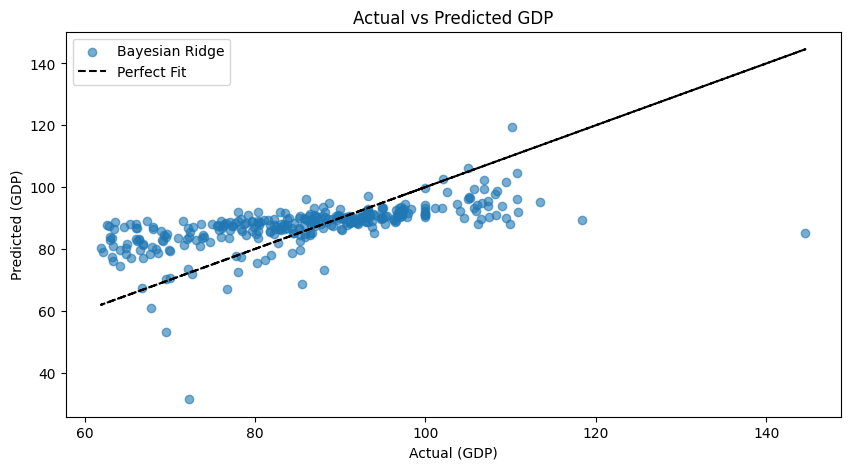

In [3]:
# Suppose X is the feature data and y is the target variable
X_lag0 = df_lag0[top_features_lag0].drop(columns=['year'])
y_lag0 = df_lag0["GDP"]

# Normalized features
scaler = StandardScaler()
X_scaled_lag0 = scaler.fit_transform(X_lag0)

# Divide the dataset at an 8:2 scale
X_train_lag0, X_test_lag0, y_train_lag0, y_test_lag0 = train_test_split(
    X_scaled_lag0, y_lag0, test_size=0.2, random_state=42
)

# Bayesian regression hyperparameter tuning
param_grid = {
    'alpha_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'alpha_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
}

# Train a Bayesian regression model
bayesian_model = BayesianRidge()

# Grid search
grid_search = GridSearchCV(bayesian_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_lag0, y_train_lag0)
print(grid_search.best_params_)

# Use the best model for prediction
best_bayesian_model = grid_search.best_estimator_
y_train_pred = best_bayesian_model.predict(X_train_lag0)
y_pred_bayes_lag0 = best_bayesian_model.predict(X_test_lag0)

# Calculate the evaluation metrics on the training set
mse_train = mean_squared_error(y_train_lag0, y_train_pred)
mae_train = mean_absolute_error(y_train_lag0, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train_lag0, y_train_pred)
r2_train = r2_score(y_train_lag0, y_train_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test_lag0, y_pred_bayes_lag0)
mae = mean_absolute_error(y_test_lag0, y_pred_bayes_lag0)
mape = mean_absolute_percentage_error(y_test_lag0, y_pred_bayes_lag0)
r2_bayes = r2_score(y_test_lag0, y_pred_bayes_lag0)

# Outputs the results of the training set
print("Training Set Results:")
print(f"Bayesian Regression - Mean Square Error (MSE): {mse_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape_train:.2f}")
print(f"Bayesian Regression - R²: {r2_train:.10f}")
print("\n")

# Output the result
print(f"Bayesian Regression - Mean Square Error (MSE): {mse:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Bayesian Regression - R²: {r2_bayes:.10f}")

# Visualize the performance of predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test_lag0, y_pred_bayes_lag0, label="Bayesian Ridge", alpha=0.6)
plt.plot(y_test_lag0, y_test_lag0, "k--", label="Perfect Fit")
plt.xlabel("Actual (GDP)")
plt.ylabel("Predicted (GDP)")
plt.legend()
plt.title("Actual vs Predicted GDP")
plt.show()

{'alpha_1': 1, 'alpha_2': 1e-10, 'lambda_1': 1e-10, 'lambda_2': 1}
Training Set Results:
Bayesian Regression - Mean Square Error (MSE): 117.73
Bayesian Regression - Mean Absolute Error (MAE): 8.19
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3597270325


Bayesian Regression - Mean Square Error (MSE): 110.61
Bayesian Regression - Mean Absolute Error (MAE): 8.05
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3580595249


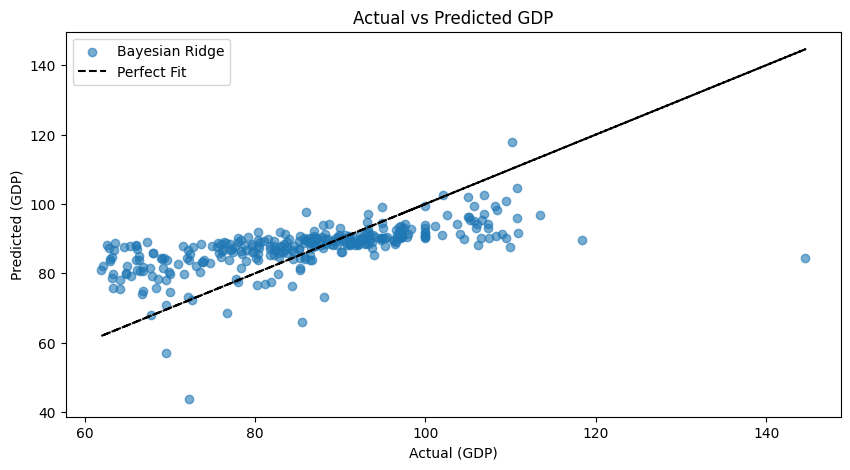

In [ ]:

X_lag1 = df_lag1[top_features_lag1].drop(columns=['year'])
y_lag1 = df_lag1["GDP"]


scaler = StandardScaler()
X_scaled_lag1 = scaler.fit_transform(X_lag1)


X_train_lag1, X_test_lag1, y_train_lag1, y_test_lag1 = train_test_split(
    X_scaled_lag1, y_lag1, test_size=0.2, random_state=42
)


param_grid = {
    'alpha_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'alpha_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
}



bayesian_model = BayesianRidge()


grid_search = GridSearchCV(bayesian_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_lag1, y_train_lag1)
print(grid_search.best_params_)


best_bayesian_model = grid_search.best_estimator_
y_train_pred = best_bayesian_model.predict(X_train_lag1)
y_pred_bayes_lag1 = best_bayesian_model.predict(X_test_lag1)


mse_train = mean_squared_error(y_train_lag1, y_train_pred)
mae_train = mean_absolute_error(y_train_lag1, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train_lag1, y_train_pred)
r2_train = r2_score(y_train_lag1, y_train_pred)


mse = mean_squared_error(y_test_lag1, y_pred_bayes_lag1)
mae = mean_absolute_error(y_test_lag1, y_pred_bayes_lag1)
mape = mean_absolute_percentage_error(y_test_lag1, y_pred_bayes_lag1)
r2_bayes = r2_score(y_test_lag1, y_pred_bayes_lag1)

# Outputs the results of the training set
print("Training Set Results:")
print(f"Bayesian Regression - Mean Square Error (MSE): {mse_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape_train:.2f}")
print(f"Bayesian Regression - R²: {r2_train:.10f}")
print("\n")

# Output the result
print(f"Bayesian Regression - Mean Square Error (MSE): {mse:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Bayesian Regression - R²: {r2_bayes:.10f}")


plt.figure(figsize=(10, 5))
plt.scatter(y_test_lag1, y_pred_bayes_lag1, label="Bayesian Ridge", alpha=0.6)
plt.plot(y_test_lag1, y_test_lag1, "k--", label="Perfect Fit")
plt.xlabel("Actual (GDP)")
plt.ylabel("Predicted (GDP)")
plt.legend()
plt.title("Actual vs Predicted GDP")
plt.show()

{'alpha_1': 1, 'alpha_2': 1e-10, 'lambda_1': 1e-10, 'lambda_2': 1}
Training Set Results:
Bayesian Regression - Mean Square Error (MSE): 119.69
Bayesian Regression - Mean Absolute Error (MAE): 8.27
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3490668117


Bayesian Regression - Mean Square Error (MSE): 112.25
Bayesian Regression - Mean Absolute Error (MAE): 8.19
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3485231743


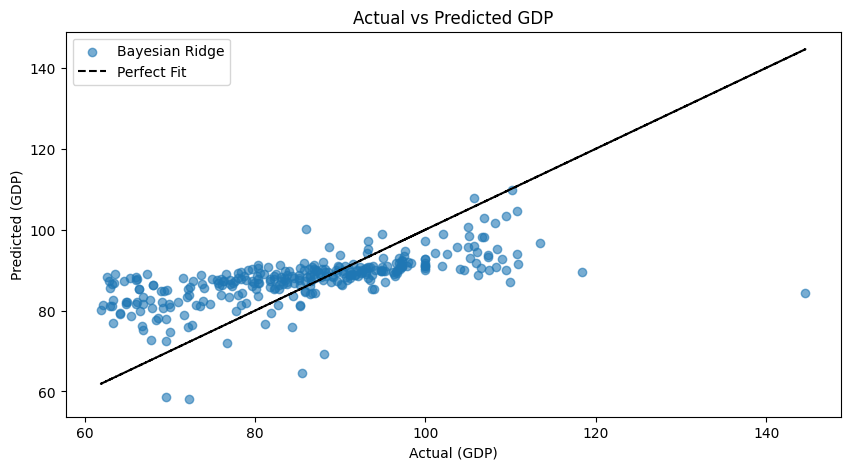

In [ ]:

X_lag2 = df_lag2[top_features_lag2].drop(columns=['year'])
y_lag2 = df_lag2["GDP"]


scaler = StandardScaler()
X_scaled_lag2 = scaler.fit_transform(X_lag2)


X_train_lag2, X_test_lag2, y_train_lag2, y_test_lag2 = train_test_split(
    X_scaled_lag2, y_lag2, test_size=0.2, random_state=42
)


param_grid = {
    'alpha_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'alpha_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
}


bayesian_model = BayesianRidge()


grid_search = GridSearchCV(bayesian_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_lag2, y_train_lag2)
print(grid_search.best_params_)


best_bayesian_model = grid_search.best_estimator_
y_train_pred = best_bayesian_model.predict(X_train_lag2)
y_pred_bayes_lag2 = best_bayesian_model.predict(X_test_lag2)


mse_train = mean_squared_error(y_train_lag2, y_train_pred)
mae_train = mean_absolute_error(y_train_lag2, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train_lag2, y_train_pred)
r2_train = r2_score(y_train_lag2, y_train_pred)


mse = mean_squared_error(y_test_lag2, y_pred_bayes_lag2)
mae = mean_absolute_error(y_test_lag2, y_pred_bayes_lag2)
mape = mean_absolute_percentage_error(y_test_lag2, y_pred_bayes_lag2)
r2_bayes = r2_score(y_test_lag2, y_pred_bayes_lag2)

# Outputs the results of the training set
print("Training Set Results:")
print(f"Bayesian Regression - Mean Square Error (MSE): {mse_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape_train:.2f}")
print(f"Bayesian Regression - R²: {r2_train:.10f}")
print("\n")

# Output the result
print(f"Bayesian Regression - Mean Square Error (MSE): {mse:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Bayesian Regression - R²: {r2_bayes:.10f}")


plt.figure(figsize=(10, 5))
plt.scatter(y_test_lag2, y_pred_bayes_lag2, label="Bayesian Ridge", alpha=0.6)
plt.plot(y_test_lag2, y_test_lag2, "k--", label="Perfect Fit")
plt.xlabel("Actual (GDP)")
plt.ylabel("Predicted (GDP)")
plt.legend()
plt.title("Actual vs Predicted GDP")
plt.show()

{'alpha_1': 1, 'alpha_2': 1e-08, 'lambda_1': 1e-10, 'lambda_2': 1}
Training Set Results:
Bayesian Regression - Mean Square Error (MSE): 131.31
Bayesian Regression - Mean Absolute Error (MAE): 8.73
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.2858370835


Bayesian Regression - Mean Square Error (MSE): 128.38
Bayesian Regression - Mean Absolute Error (MAE): 8.84
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.11
Bayesian Regression - R²: 0.2549368703


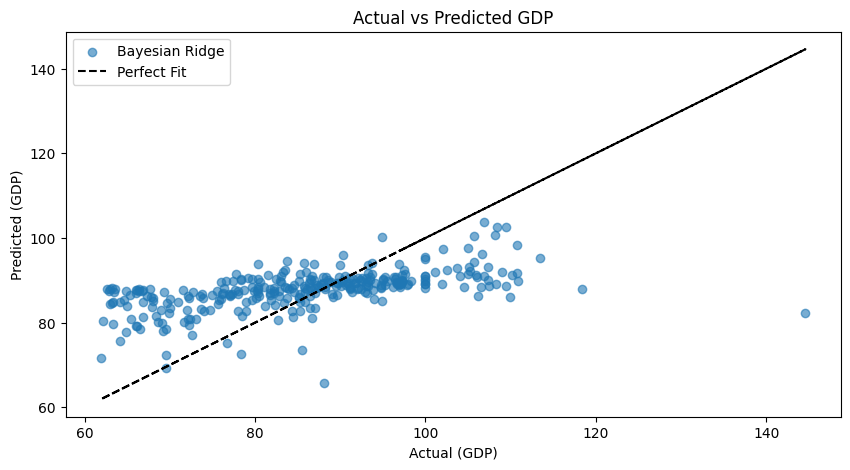

In [ ]:

X_lag3 = df_lag3[top_features_lag3].drop(columns=['year'])
y_lag3 = df_lag3["GDP"]


scaler = StandardScaler()
X_scaled_lag3 = scaler.fit_transform(X_lag3)


X_train_lag3, X_test_lag3, y_train_lag3, y_test_lag3 = train_test_split(
    X_scaled_lag3, y_lag3, test_size=0.2, random_state=42
)


param_grid = {
    'alpha_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'alpha_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
}



bayesian_model = BayesianRidge()


grid_search = GridSearchCV(bayesian_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_lag3, y_train_lag3)
print(grid_search.best_params_)


best_bayesian_model = grid_search.best_estimator_
y_train_pred = best_bayesian_model.predict(X_train_lag3)
y_pred_bayes_lag3 = best_bayesian_model.predict(X_test_lag3)


mse_train = mean_squared_error(y_train_lag3, y_train_pred)
mae_train = mean_absolute_error(y_train_lag3, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train_lag3, y_train_pred)
r2_train = r2_score(y_train_lag3, y_train_pred)


mse = mean_squared_error(y_test_lag3, y_pred_bayes_lag3)
mae = mean_absolute_error(y_test_lag3, y_pred_bayes_lag3)
mape = mean_absolute_percentage_error(y_test_lag3, y_pred_bayes_lag3)
r2_bayes = r2_score(y_test_lag3, y_pred_bayes_lag3)

# Outputs the results of the training set
print("Training Set Results:")
print(f"Bayesian Regression - Mean Square Error (MSE): {mse_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape_train:.2f}")
print(f"Bayesian Regression - R²: {r2_train:.10f}")
print("\n")

# Output the result
print(f"Bayesian Regression - Mean Square Error (MSE): {mse:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Bayesian Regression - R²: {r2_bayes:.10f}")


plt.figure(figsize=(10, 5))
plt.scatter(y_test_lag3, y_pred_bayes_lag3, label="Bayesian Ridge", alpha=0.6)
plt.plot(y_test_lag3, y_test_lag3, "k--", label="Perfect Fit")
plt.xlabel("Actual (GDP)")
plt.ylabel("Predicted (GDP)")
plt.legend()
plt.title("Actual vs Predicted GDP")
plt.show()

{'alpha_1': 1e-10, 'alpha_2': 1, 'lambda_1': 1e-10, 'lambda_2': 1}
Training Set Results:
Bayesian Regression - Mean Square Error (MSE): 104.27
Bayesian Regression - Mean Absolute Error (MAE): 7.75
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.09
Bayesian Regression - R²: 0.3627991779


Bayesian Regression - Mean Square Error (MSE): 121.24
Bayesian Regression - Mean Absolute Error (MAE): 8.63
Bayesian Regression - Mean Absolute Percentage Error (MAPE): 0.10
Bayesian Regression - R²: 0.3284808663


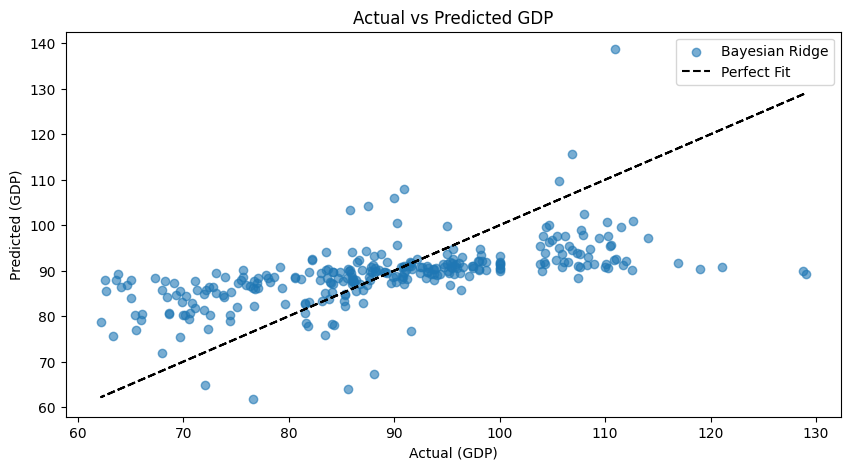

In [ ]:

X_lag4 = df_lag4[top_features_lag4].drop(columns=['year'])
y_lag4 = df_lag4["GDP"]


scaler = StandardScaler()
X_scaled_lag4 = scaler.fit_transform(X_lag4)


X_train_lag4, X_test_lag4, y_train_lag4, y_test_lag4 = train_test_split(
    X_scaled_lag4, y_lag4, test_size=0.2, random_state=42
)


param_grid = {
    'alpha_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'alpha_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_1': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10],
    'lambda_2': [1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
}


bayesian_model = BayesianRidge()


grid_search = GridSearchCV(bayesian_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_lag4, y_train_lag4)
print(grid_search.best_params_)


best_bayesian_model = grid_search.best_estimator_
y_train_pred = best_bayesian_model.predict(X_train_lag4)
y_pred_bayes_lag4 = best_bayesian_model.predict(X_test_lag4)


mse_train = mean_squared_error(y_train_lag4, y_train_pred)
mae_train = mean_absolute_error(y_train_lag4, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train_lag4, y_train_pred)
r2_train = r2_score(y_train_lag4, y_train_pred)


mse = mean_squared_error(y_test_lag4, y_pred_bayes_lag4)
mae = mean_absolute_error(y_test_lag4, y_pred_bayes_lag4)
mape = mean_absolute_percentage_error(y_test_lag4, y_pred_bayes_lag4)
r2_bayes = r2_score(y_test_lag4, y_pred_bayes_lag4)

# Outputs the results of the training set
print("Training Set Results:")
print(f"Bayesian Regression - Mean Square Error (MSE): {mse_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape_train:.2f}")
print(f"Bayesian Regression - R²: {r2_train:.10f}")
print("\n")

# Output the result
print(f"Bayesian Regression - Mean Square Error (MSE): {mse:.2f}")
print(f"Bayesian Regression - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Bayesian Regression - Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Bayesian Regression - R²: {r2_bayes:.10f}")


plt.figure(figsize=(10, 5))
plt.scatter(y_test_lag4, y_pred_bayes_lag4, label="Bayesian Ridge", alpha=0.6)
plt.plot(y_test_lag4, y_test_lag4, "k--", label="Perfect Fit")
plt.xlabel("Actual (GDP)")
plt.ylabel("Predicted (GDP)")
plt.legend()
plt.title("Actual vs Predicted GDP")
plt.show()